# PointNet model runs

- **Purpose**: The purpose of this notebook is to analyze models trained with different configurations.
- **Author**: Rakesh Pandey

In [1]:
cd ../

/home/rakesh/refactor/richai


# Imports

In [2]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    RocCurveDisplay,
)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.plotting import plot_efficiencies, plot_cm


In [3]:
RESULT_DIR = "/fast_scratch_1/capstone_2022/models/pointnet/saved_models/"
OPERATING_POINT = 0.5


## Run 1 - Model with momentum and radius

- Momentum and radius
- delta: 0.2
- Epochs: 16
- Train: B and C
- Test: A 

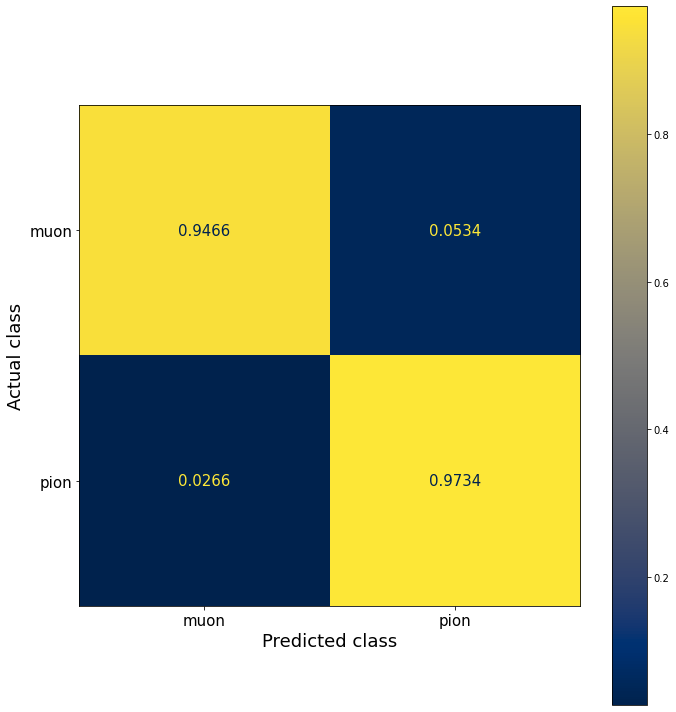

In [4]:
path = os.path.join(RESULT_DIR, "predictions_momentum_radius_16epochs_0.2_0306_unbalanced_p_15_45.csv")

run1_df = pd.read_csv(path)
run1_df["predictions"] = np.where(run1_df["probabilities"] > OPERATING_POINT, 1, 0)

plot_cm(y_true=run1_df["labels"], y_pred=run1_df["predictions"])

## Run 2 - Model with momentum (16 epochs)

- Momentum: True
- Radius: False
- delta: 0.2
- Epochs: 16
- Train: B and C
- Test: A

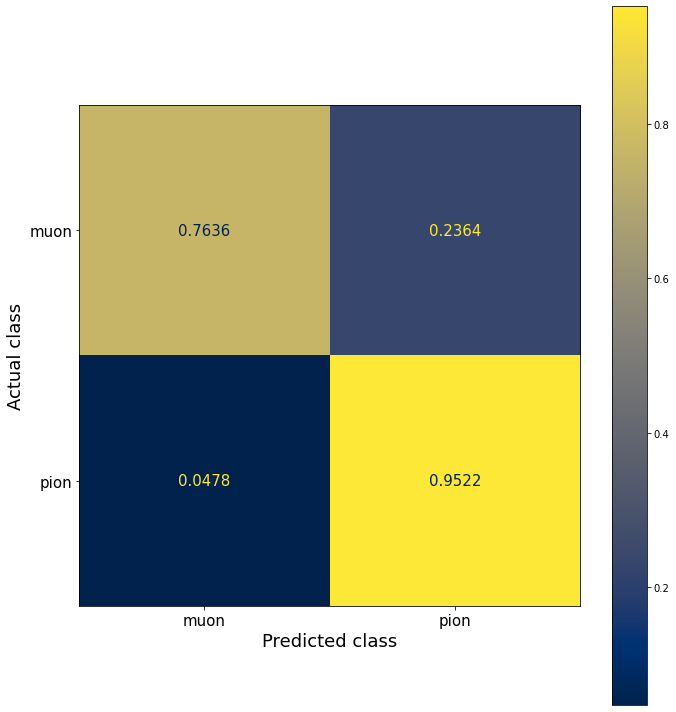

In [5]:
path = os.path.join(RESULT_DIR, "pointnet_momentum_only_0506_16epochs_unbalanced_p_15_45.csv")

run2_df = pd.read_csv(path)
run2_df["predictions"] = np.where(run2_df["probabilities"] > OPERATING_POINT, 1, 0)

plot_cm(y_true=run2_df["labels"], y_pred=run2_df["predictions"])


## Run 3 - Model with momentum (24 epochs)

- Momentum: True
- Radius: False
- delta: 0.2
- Epochs: 24
- Train: B and C
- Test: A 

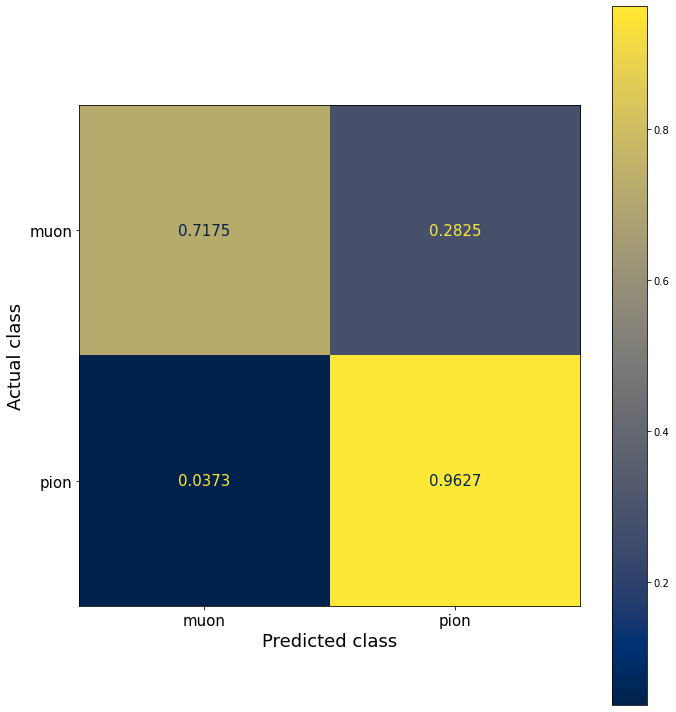

In [6]:
path = os.path.join(RESULT_DIR, "pointnet_momentum_only_0506_24epochs_unbalanced_p_15_45.csv")

run3_df = pd.read_csv(path)
run3_df["predictions"] = np.where(run3_df["probabilities"] > OPERATING_POINT, 1, 0)

plot_cm(y_true=run3_df["labels"], y_pred=run3_df["predictions"])



## Run 4 - Model with momentum and radius (16 epochs, delta 0.5)

- Momentum: True
- Radius: True
- delta: 0.5
- Epochs: 16
- Train: B and C
- Test: A 

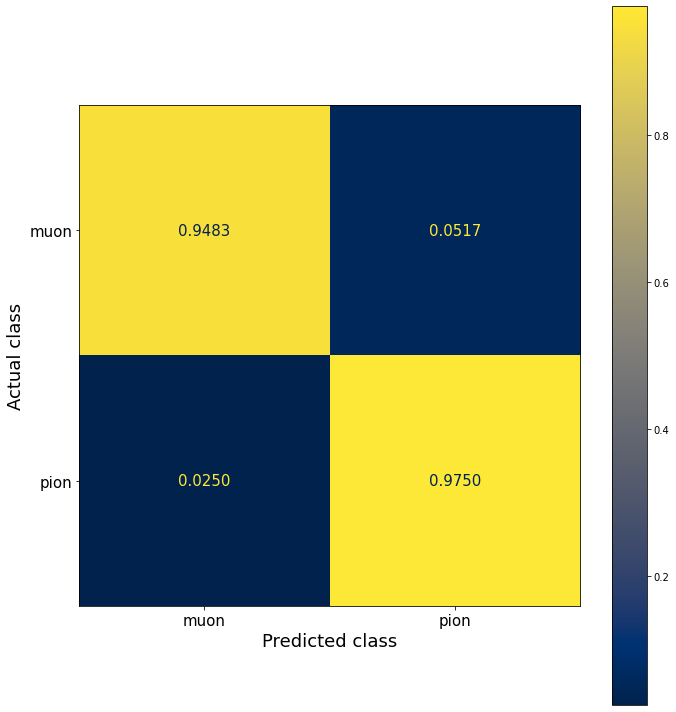

In [7]:
path = os.path.join(RESULT_DIR, "pointnet_momentum_radius_delta_0.5_16e_0706_unbalanced_p_15_45.csv")

run4_df = pd.read_csv(path)
run4_df["predictions"] = np.where(run4_df["probabilities"] > OPERATING_POINT, 1, 0)

plot_cm(y_true=run4_df["labels"], y_pred=run4_df["predictions"])




## Roc Curve

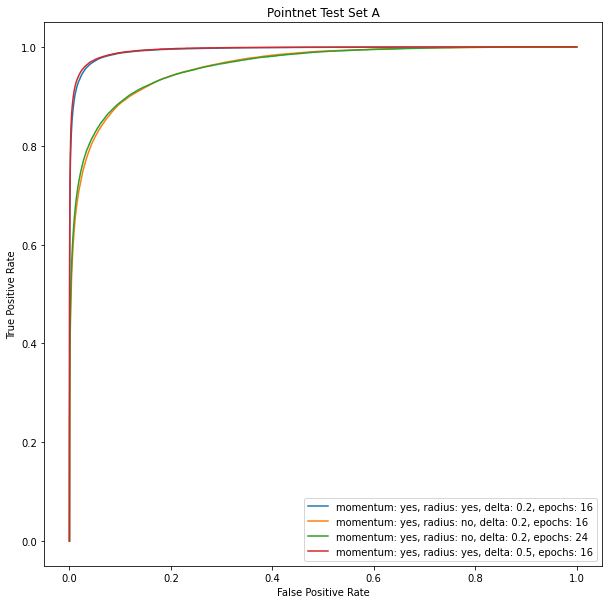

In [8]:
models = {
    "momentum: yes, radius: yes, delta: 0.2, epochs: 16": run1_df,
    "momentum: yes, radius: no, delta: 0.2, epochs: 16": run2_df,
    "momentum: yes, radius: no, delta: 0.2, epochs: 24": run3_df,
    "momentum: yes, radius: yes, delta: 0.5, epochs: 16": run4_df,
}


def plot_roc_curves(models):

    fig, ax = plt.subplots(figsize=(10, 10))

    for name, df in models.items():

        fpr, tpr, _ = roc_curve(
            y_true=df["labels"],
            y_score=df["probabilities"],
        )

        disp = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=name)

        disp.plot(ax=ax)

    ax.set_title("Pointnet Test Set A")
    plt.show()


plot_roc_curves(models)
